# Import libraries

In [1]:
import cv2
import operator
import numpy as np
from mtcnn import MTCNN
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load models

In [2]:
age_sex_models = keras.models.load_model('./age_sex_model.hdf5')

facial_model = keras.models.load_model('./facial_exprassion_model.hdf5')

# Preprocessing inputs functions

In [3]:
def gender(s):
    if float(s) < 0.4:
        return str('man')
    else:
        return str('woman')

def facial_pred_decode(list_):
#     dictionary = {0:'anger', 1:'contempt', 2:'disgust', 3:'fear', 4:'happy', 5:'sadness',6:'surprise'}
    dictionary = {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4:'natural', 5:'sad',6:'surprise'}
    _ , min_value = min(enumerate(list_), key=operator.itemgetter(1))
    max_index_1, _ = max(enumerate(list_), key=operator.itemgetter(1))
    first_rank = dictionary[max_index_1]
    list_[max_index_1] = min_value
    max_index_2, _ = max(enumerate(list_), key=operator.itemgetter(1))
    second_rank = dictionary[max_index_2]
    return  first_rank , second_rank

def face_detect(img_path):
    img = cv2.imread(img_path)
    model = MTCNN()
    face = model.detect_faces(img)
    boundingbox = face[0]['box']
    img = img[boundingbox[1]+10:boundingbox[1]+boundingbox[2]+20 , boundingbox[0]-10:boundingbox[0]+boundingbox[3]-10]
    return img

def resize(img , height , width):
    img = tf.image.resize(img , (height , width) , method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return img

def normalize(image):
    image = (image / 255)
    return image

def load_img(image_path):
    main = cv2.imread(image_path)
    img = face_detect(image_path)
#     img = tf.image.decode_image(img , 3 ,expand_animations=False)
    img = tf.cast(img , tf.float32)
    img = resize(img , 224 , 224)
    img = normalize(img)
    return main , img

def load_img_realtime(img):
    img = tf.cast(img , tf.float32)
    img = resize(img , 224 , 224)
    img = normalize(img)
    return img

# Inference

In [4]:
def inference(img_path):
    main ,img = load_img(img_path)
    img_d = tf.expand_dims(img, axis=0)
#     print('main shape is ',main.shape)
#     print('dim shape is ',img_d.shape)
    pred_sex_age = age_sex_models.predict(img_d)
    pred_facial = facial_model.predict(img_d)
### get predicate labels
    age_label = float(pred_sex_age[0][0][0])
    sex_label = gender(int(pred_sex_age[1][0][0]))
    facial = facial_pred_decode(pred_facial[0])
#     plt.imshow(face_detect(img_path))
#     plt.show()
    plt.imshow(main , cmap='gray')
    plt.show()
#     print(' sex = {}\n age = {}\n facial = {}'.format(sex_label , np.round(age_label) , facial))
    return sex_label , np.round(age_label) , facial

1/1 [==============================] - 0s 14ms/step


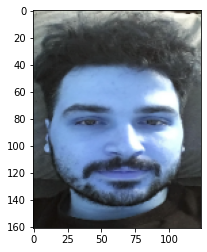

('man', 27.0, ('anger', 'disgust'))

In [6]:
inference('./image/test4.png')